## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [93]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [94]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [95]:
env = TicTacToe()

In [96]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions # [Position, Value]

In [97]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [98]:
max_epsilon = 1.0
min_epsilon = 0.001
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()
        
    if z > epsilon:
        state_local = Q_state(state)
        action = max(Q_dict[state_local],key=Q_dict[state_local].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_actions = [i for i in env.action_space(state)[0]]
        index = np.random.choice(range(len(possible_actions)))    #Exploration: randomly choosing and action
        action = possible_actions[index]

    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [99]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

print(len(Q_dict))
print(len(States_track))

0
0


In [100]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-x-3-x-8-x-x-x',(2,7)),('7-x-x-x-x-x-x-x-8',(6,5)),('x-x-8-x-7-x-x-x-x',(8,7)),('x-3-x-x-x-x-x-6-x',(0,7))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [101]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [102]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [103]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [104]:
#Defining parameters for the experiment

EPISODES = 300000

LR = 0.01                   #learning rate
GAMMA = 0.91


states_threshold = 50       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)

policy_threshold = 50

### Q-update loop ---write your code here

In [105]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe()
    ##### Start writing your code from the next line
    curr_state = env.state     #note that we are starting on this day's evening because action is taken in the evening
    is_game_over = False
    if episode % 100 == 0:
        print("Episode #: ", episode)
    add_to_dict(curr_state)
    
    while is_game_over != True:
        curr_state_local = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, is_game_over = env.step(curr_state, curr_action) # Next state and reward from Env
        next_state_local = Q_state(next_state)
        add_to_dict(curr_state)
        
        # UPDATE RULE
        if is_game_over == False:
            max_next = max(Q_dict[next_state_local],key=Q_dict[next_state_local].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state_local][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_local][max_next]))) - Q_dict[curr_state_local][curr_action] ) 
        else:
            Q_dict[curr_state_local][curr_action] += LR * (reward - Q_dict[curr_state_local][curr_action] )
    
        
        curr_state = next_state
    
        #states tracking   
        if ((episode+1)%states_threshold)==0:
            save_tracking_states()
            save_obj(States_track,'States_tracked')
             

        if ((episode+1)% policy_threshold) == 0:  
            save_obj(Q_dict,'Policy_Q_dict')  
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy_Q_dict')

Episode #:  0
Episode #:  100
Episode #:  200
Episode #:  300
Episode #:  400
Episode #:  500
Episode #:  600
Episode #:  700
Episode #:  800
Episode #:  900
Episode #:  1000
Episode #:  1100
Episode #:  1200
Episode #:  1300
Episode #:  1400
Episode #:  1500
Episode #:  1600
Episode #:  1700
Episode #:  1800
Episode #:  1900
Episode #:  2000
Episode #:  2100
Episode #:  2200
Episode #:  2300
Episode #:  2400
Episode #:  2500
Episode #:  2600
Episode #:  2700
Episode #:  2800
Episode #:  2900
Episode #:  3000
Episode #:  3100
Episode #:  3200
Episode #:  3300
Episode #:  3400
Episode #:  3500
Episode #:  3600
Episode #:  3700
Episode #:  3800
Episode #:  3900
Episode #:  4000
Episode #:  4100
Episode #:  4200
Episode #:  4300
Episode #:  4400
Episode #:  4500
Episode #:  4600
Episode #:  4700
Episode #:  4800
Episode #:  4900
Episode #:  5000
Episode #:  5100
Episode #:  5200
Episode #:  5300
Episode #:  5400
Episode #:  5500
Episode #:  5600
Episode #:  5700
Episode #:  5800
Episode #

Episode #:  46200
Episode #:  46300
Episode #:  46400
Episode #:  46500
Episode #:  46600
Episode #:  46700
Episode #:  46800
Episode #:  46900
Episode #:  47000
Episode #:  47100
Episode #:  47200
Episode #:  47300
Episode #:  47400
Episode #:  47500
Episode #:  47600
Episode #:  47700
Episode #:  47800
Episode #:  47900
Episode #:  48000
Episode #:  48100
Episode #:  48200
Episode #:  48300
Episode #:  48400
Episode #:  48500
Episode #:  48600
Episode #:  48700
Episode #:  48800
Episode #:  48900
Episode #:  49000
Episode #:  49100
Episode #:  49200
Episode #:  49300
Episode #:  49400
Episode #:  49500
Episode #:  49600
Episode #:  49700
Episode #:  49800
Episode #:  49900
Episode #:  50000
Episode #:  50100
Episode #:  50200
Episode #:  50300
Episode #:  50400
Episode #:  50500
Episode #:  50600
Episode #:  50700
Episode #:  50800
Episode #:  50900
Episode #:  51000
Episode #:  51100
Episode #:  51200
Episode #:  51300
Episode #:  51400
Episode #:  51500
Episode #:  51600
Episode #:

Episode #:  91800
Episode #:  91900
Episode #:  92000
Episode #:  92100
Episode #:  92200
Episode #:  92300
Episode #:  92400
Episode #:  92500
Episode #:  92600
Episode #:  92700
Episode #:  92800
Episode #:  92900
Episode #:  93000
Episode #:  93100
Episode #:  93200
Episode #:  93300
Episode #:  93400
Episode #:  93500
Episode #:  93600
Episode #:  93700
Episode #:  93800
Episode #:  93900
Episode #:  94000
Episode #:  94100
Episode #:  94200
Episode #:  94300
Episode #:  94400
Episode #:  94500
Episode #:  94600
Episode #:  94700
Episode #:  94800
Episode #:  94900
Episode #:  95000
Episode #:  95100
Episode #:  95200
Episode #:  95300
Episode #:  95400
Episode #:  95500
Episode #:  95600
Episode #:  95700
Episode #:  95800
Episode #:  95900
Episode #:  96000
Episode #:  96100
Episode #:  96200
Episode #:  96300
Episode #:  96400
Episode #:  96500
Episode #:  96600
Episode #:  96700
Episode #:  96800
Episode #:  96900
Episode #:  97000
Episode #:  97100
Episode #:  97200
Episode #:

Episode #:  135400
Episode #:  135500
Episode #:  135600
Episode #:  135700
Episode #:  135800
Episode #:  135900
Episode #:  136000
Episode #:  136100
Episode #:  136200
Episode #:  136300
Episode #:  136400
Episode #:  136500
Episode #:  136600
Episode #:  136700
Episode #:  136800
Episode #:  136900
Episode #:  137000
Episode #:  137100
Episode #:  137200
Episode #:  137300
Episode #:  137400
Episode #:  137500
Episode #:  137600
Episode #:  137700
Episode #:  137800
Episode #:  137900
Episode #:  138000
Episode #:  138100
Episode #:  138200
Episode #:  138300
Episode #:  138400
Episode #:  138500
Episode #:  138600
Episode #:  138700
Episode #:  138800
Episode #:  138900
Episode #:  139000
Episode #:  139100
Episode #:  139200
Episode #:  139300
Episode #:  139400
Episode #:  139500
Episode #:  139600
Episode #:  139700
Episode #:  139800
Episode #:  139900
Episode #:  140000
Episode #:  140100
Episode #:  140200
Episode #:  140300
Episode #:  140400
Episode #:  140500
Episode #:  

Episode #:  178600
Episode #:  178700
Episode #:  178800
Episode #:  178900
Episode #:  179000
Episode #:  179100
Episode #:  179200
Episode #:  179300
Episode #:  179400
Episode #:  179500
Episode #:  179600
Episode #:  179700
Episode #:  179800
Episode #:  179900
Episode #:  180000
Episode #:  180100
Episode #:  180200
Episode #:  180300
Episode #:  180400
Episode #:  180500
Episode #:  180600
Episode #:  180700
Episode #:  180800
Episode #:  180900
Episode #:  181000
Episode #:  181100
Episode #:  181200
Episode #:  181300
Episode #:  181400
Episode #:  181500
Episode #:  181600
Episode #:  181700
Episode #:  181800
Episode #:  181900
Episode #:  182000
Episode #:  182100
Episode #:  182200
Episode #:  182300
Episode #:  182400
Episode #:  182500
Episode #:  182600
Episode #:  182700
Episode #:  182800
Episode #:  182900
Episode #:  183000
Episode #:  183100
Episode #:  183200
Episode #:  183300
Episode #:  183400
Episode #:  183500
Episode #:  183600
Episode #:  183700
Episode #:  

Episode #:  221800
Episode #:  221900
Episode #:  222000
Episode #:  222100
Episode #:  222200
Episode #:  222300
Episode #:  222400
Episode #:  222500
Episode #:  222600
Episode #:  222700
Episode #:  222800
Episode #:  222900
Episode #:  223000
Episode #:  223100
Episode #:  223200
Episode #:  223300
Episode #:  223400
Episode #:  223500
Episode #:  223600
Episode #:  223700
Episode #:  223800
Episode #:  223900
Episode #:  224000
Episode #:  224100
Episode #:  224200
Episode #:  224300
Episode #:  224400
Episode #:  224500
Episode #:  224600
Episode #:  224700
Episode #:  224800
Episode #:  224900
Episode #:  225000
Episode #:  225100
Episode #:  225200
Episode #:  225300
Episode #:  225400
Episode #:  225500
Episode #:  225600
Episode #:  225700
Episode #:  225800
Episode #:  225900
Episode #:  226000
Episode #:  226100
Episode #:  226200
Episode #:  226300
Episode #:  226400
Episode #:  226500
Episode #:  226600
Episode #:  226700
Episode #:  226800
Episode #:  226900
Episode #:  

Episode #:  265000
Episode #:  265100
Episode #:  265200
Episode #:  265300
Episode #:  265400
Episode #:  265500
Episode #:  265600
Episode #:  265700
Episode #:  265800
Episode #:  265900
Episode #:  266000
Episode #:  266100
Episode #:  266200
Episode #:  266300
Episode #:  266400
Episode #:  266500
Episode #:  266600
Episode #:  266700
Episode #:  266800
Episode #:  266900
Episode #:  267000
Episode #:  267100
Episode #:  267200
Episode #:  267300
Episode #:  267400
Episode #:  267500
Episode #:  267600
Episode #:  267700
Episode #:  267800
Episode #:  267900
Episode #:  268000
Episode #:  268100
Episode #:  268200
Episode #:  268300
Episode #:  268400
Episode #:  268500
Episode #:  268600
Episode #:  268700
Episode #:  268800
Episode #:  268900
Episode #:  269000
Episode #:  269100
Episode #:  269200
Episode #:  269300
Episode #:  269400
Episode #:  269500
Episode #:  269600
Episode #:  269700
Episode #:  269800
Episode #:  269900
Episode #:  270000
Episode #:  270100
Episode #:  

#### Check the Q-dictionary

In [106]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0496062631667633,
              (0, 3): -1.049440044310357,
              (0, 5): -1.0498292707842152,
              (0, 7): -1.0498479740076871,
              (0, 9): -1.0502565218210111,
              (1, 1): -1.0494629569746732,
              (1, 3): -1.0502267721154837,
              (1, 5): -1.0499334902320065,
              (1, 7): -1.0505562314143344,
              (1, 9): -1.0494564762196108,
              (2, 1): -1.0500669757348557,
              (2, 3): -1.0499546512269404,
              (2, 5): -1.0495261484619038,
              (2, 7): -1.0495843808635898,
              (2, 9): -1.0494953728910488,
              (3, 1): -1.0498974656495432,
              (3, 3): -1.0494526490989062,
              (3, 5): -1.049445805658442,
              (3, 7): -1.0494613476447587,
              (3, 9): -1.0501597199356014,
              (4, 1): -1.0495734260946026,
              (4, 3): -1.0496738191248494,
              (4,

In [107]:
len(Q_dict)

648493

##### Identifying the best action for the below states based on the max Q value

In [108]:
max(Q_dict['x-x-x-3-x-8-x-x-x'],key=Q_dict['x-x-x-3-x-8-x-x-x'].get)

(4, 7)

In [109]:
max(Q_dict['7-x-x-x-x-x-x-x-8'],key=Q_dict['7-x-x-x-x-x-x-x-8'].get)

(1, 5)

In [110]:
max(Q_dict['x-x-8-x-7-x-x-x-x'],key=Q_dict['x-x-8-x-7-x-x-x-x'].get)

(8, 1)

In [111]:
max(Q_dict['x-3-x-x-x-x-x-6-x'],key=Q_dict['x-3-x-x-x-x-x-6-x'].get)

(2, 9)

#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(*args, **kw)>

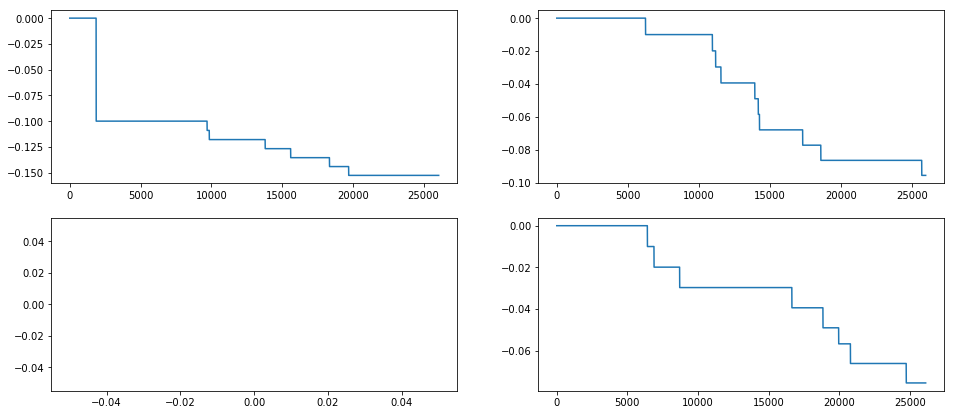

In [112]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-3-x-8-x-x-x'][(2,7)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-3-x-8-x-x-x'][(2,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['7-x-x-x-x-x-x-x-8'][(6,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['7-x-x-x-x-x-x-x-8'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-8-x-7-x-x-x-x'][(8,7)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-8-x-7-x-x-x-x'][(8,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-x-x-x-6-x'][(0,7)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-x-x-x-6-x'][(0,7)]))
plt.show


### Epsilon - decay check

In [113]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

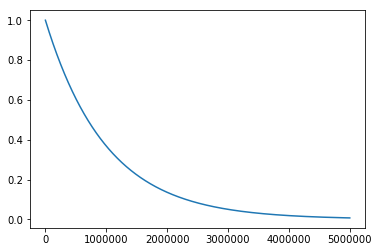

In [114]:
plt.plot(time, epsilon)
plt.show()